#Importing libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

In [5]:
#read the dataset
df= pd.read_csv('/content/drive/MyDrive/Diabetes-dataset.zip')

In [6]:
#unzip the dataset
!unzip 'Diabetes-dataset.zip'

unzip:  cannot find or open Diabetes-dataset.zip, Diabetes-dataset.zip.zip or Diabetes-dataset.zip.ZIP.


In [7]:
# show the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
389,3,100,68,23,81,31.6,0.949,28,0
736,0,126,86,27,120,27.4,0.515,21,0
743,9,140,94,0,0,32.7,0.734,45,1
353,1,90,62,12,43,27.2,0.580,24,0
613,6,105,80,28,0,32.5,0.878,26,0
95,6,144,72,27,228,33.9,0.255,40,0
261,3,141,0,0,0,30.0,0.761,27,1
283,7,161,86,0,0,30.4,0.165,47,1
202,0,108,68,20,0,27.3,0.787,32,0
546,5,187,76,27,207,43.6,1.034,53,1


In [10]:
# get the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# see the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
df.shape

(768, 9)

In [13]:
df.size

6912

Analysis the data

In [14]:
#descriptive analysis
df.describe().T.style.background_gradient(cmap='hot_r')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
#dealing with missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

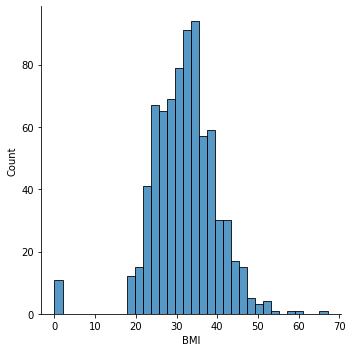

In [16]:
#univarient Analysis
import seaborn as sns
sns.displot(df, x="BMI")

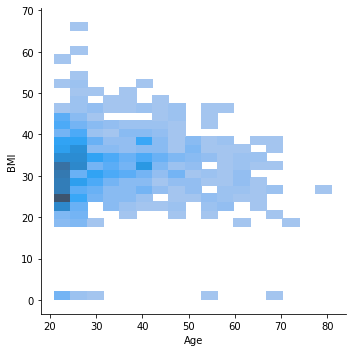

In [17]:
#Bivarient Analysis
sns.displot(df, x="Age", y="BMI")

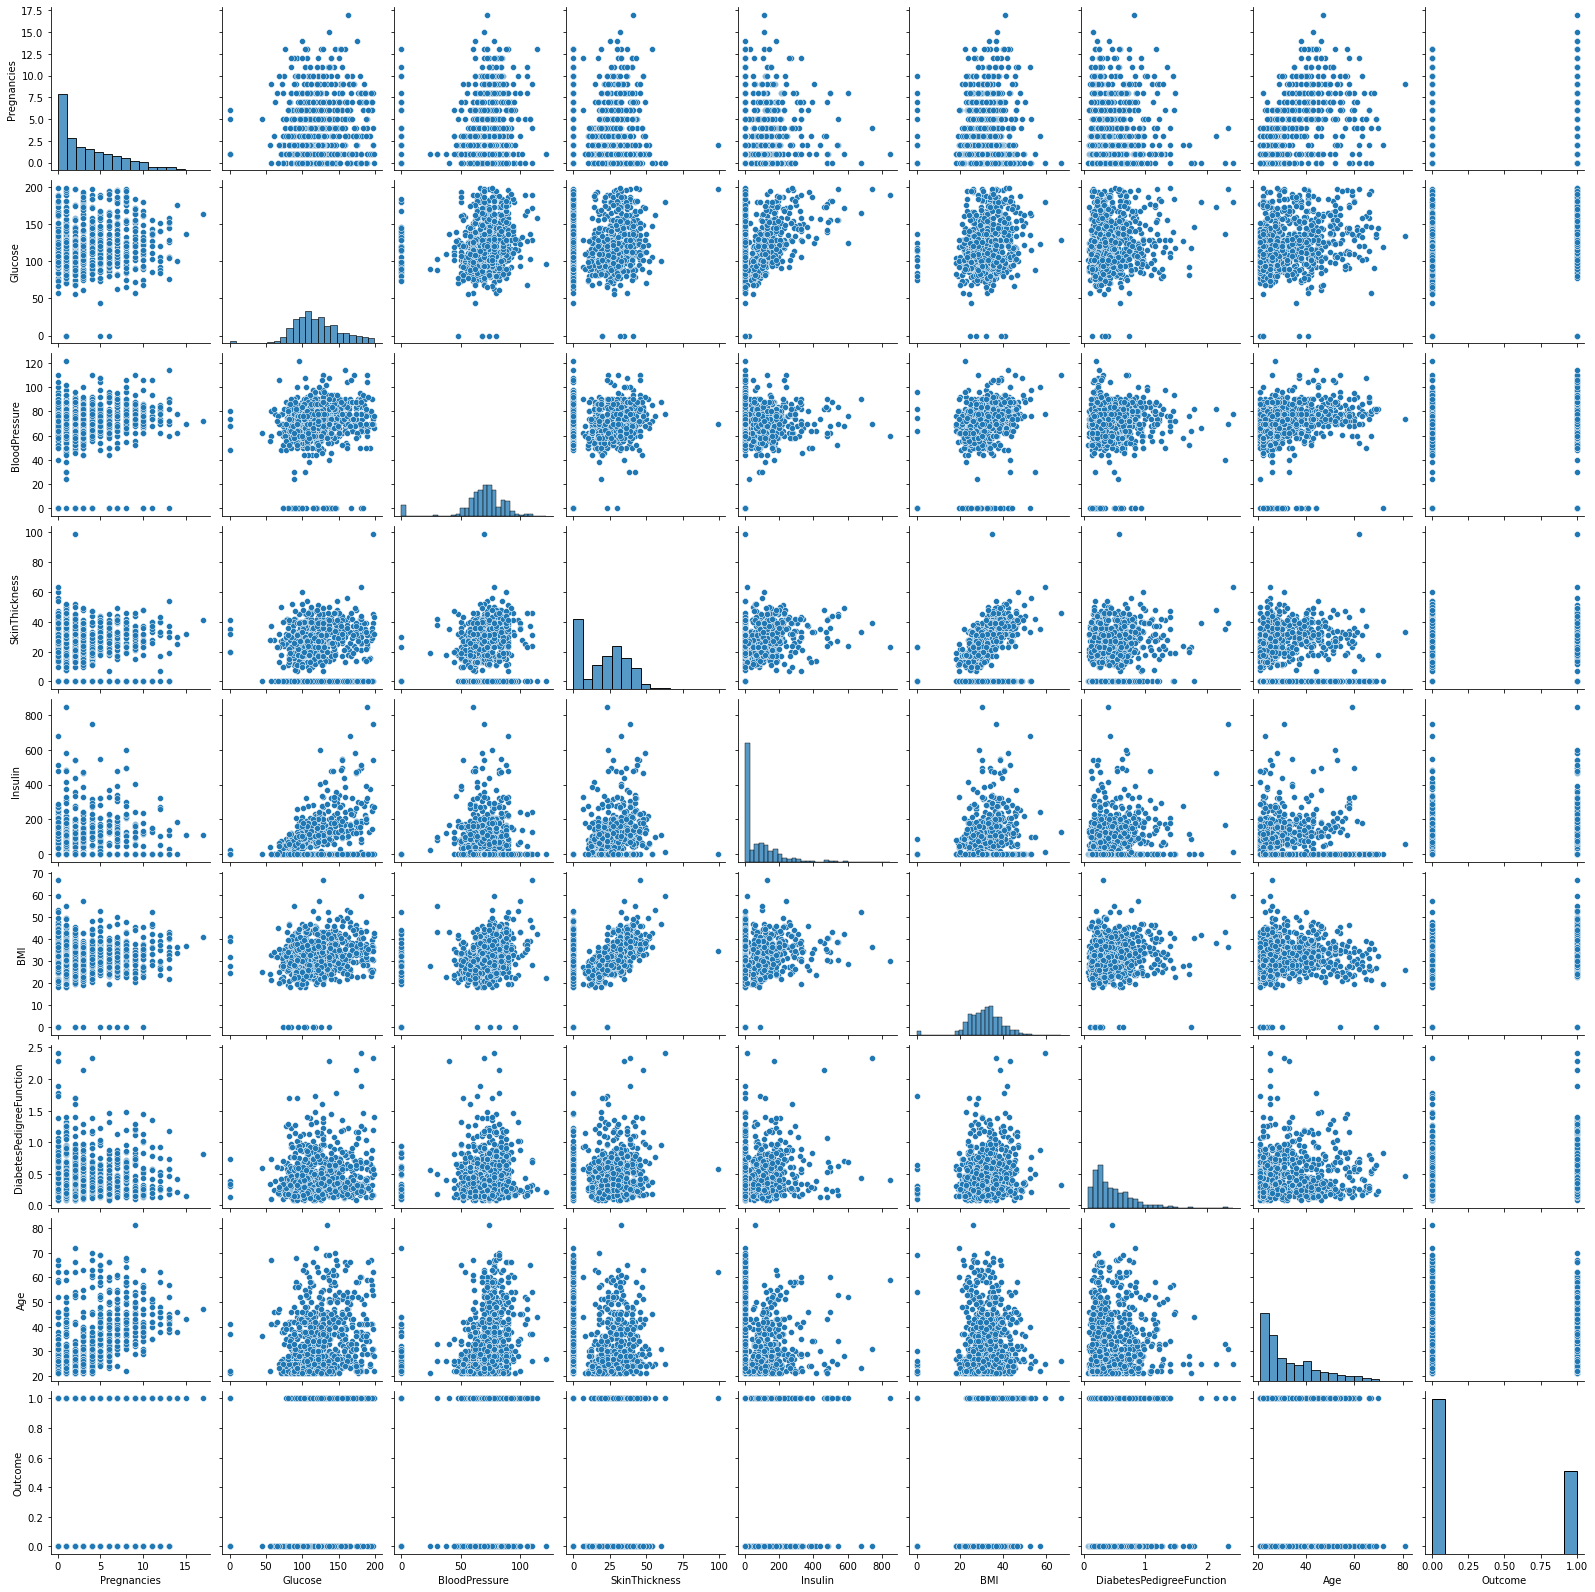

In [18]:
#Multi-varient Analysis
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


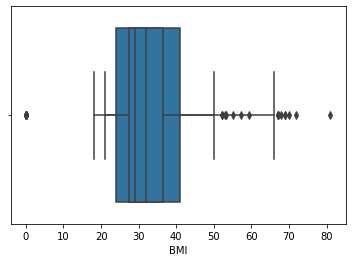

In [19]:
#dealing with outliers
sns.boxplot(df['Age'])
sns.boxplot(df['BMI'])

In [20]:
qnt =df.quantile(q=[0.25,0.75])
qnt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.25,1.0,99.00,62.0,0.0,0.00,27.3,0.24375,24.0,0.0
0.75,6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0


In [21]:
IQR =qnt.loc[0.75]-qnt.loc[0.25]
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [22]:
upper_extreme =qnt.loc[0.75]+1.5*IQR
upper_extreme

Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

In [23]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [24]:
df[df['BloodPressure']>6.200000e+01]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [25]:
df[df['BMI']> 1.300000e+01]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
df[df['Age']<1.400000e+01]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [27]:
df[df['Glucose']<-3.000000e+00]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [28]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0 

In [29]:
#Replacing outliers with mean
df['Age']=np.where(df['Age']>6.200000e+01,df['Age'].mean(),df['Age'])

In [30]:
#After replacing mean,no outliers are present for Age column 
df[df['Age']>6.200000e+01]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [31]:
df_main=pd.get_dummies(df,columns=['Glucose'])

In [32]:
df_main

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_0,Glucose_44,...,Glucose_189,Glucose_190,Glucose_191,Glucose_193,Glucose_194,Glucose_195,Glucose_196,Glucose_197,Glucose_198,Glucose_199
0,6,72,35,0,33.6,0.627,50.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,66,29,0,26.6,0.351,31.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,64,0,0,23.3,0.672,32.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,66,23,94,28.1,0.167,21.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,40,35,168,43.1,2.288,33.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,33.240885,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,2,70,27,0,36.8,0.340,27.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,5,72,23,112,26.2,0.245,30.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,1,60,0,0,30.1,0.349,47.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Modeling :
Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

We will try using cross validation method for model validation rather than train-test split, as train-test split will split model in a ratio in a random state which will cause some data to be left out for training and some for testing, using a cross validation method will split and use each splits for training and testing, thus resulting in an much accurate model validation rather than train-test split.

In [43]:
#  check of the dataset
print(df.info())
df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1
5,5,116,74,0,0,25.6,0.201,30.0,0
6,3,78,50,32,88,31.0,0.248,26.0,1


In [44]:
#note: outcome as y &rest as x
y = df.pop('Outcome')
X = df

In [45]:
print(f'X: {X.shape}\ny: {y.shape}')

X: (768, 8)
y: (768,)


In [46]:
# Creating a scaled dataset as well
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mmscaler = MinMaxScaler()
sscaler = StandardScaler()

RandomUnderSampler for balancing the bias which will be caused by class imbalance

In [47]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus.fit(X,y)
X_resampled,y_resampled = rus.fit_resample(X,y)
sX_resampled = mmscaler.fit_transform(X_resampled)

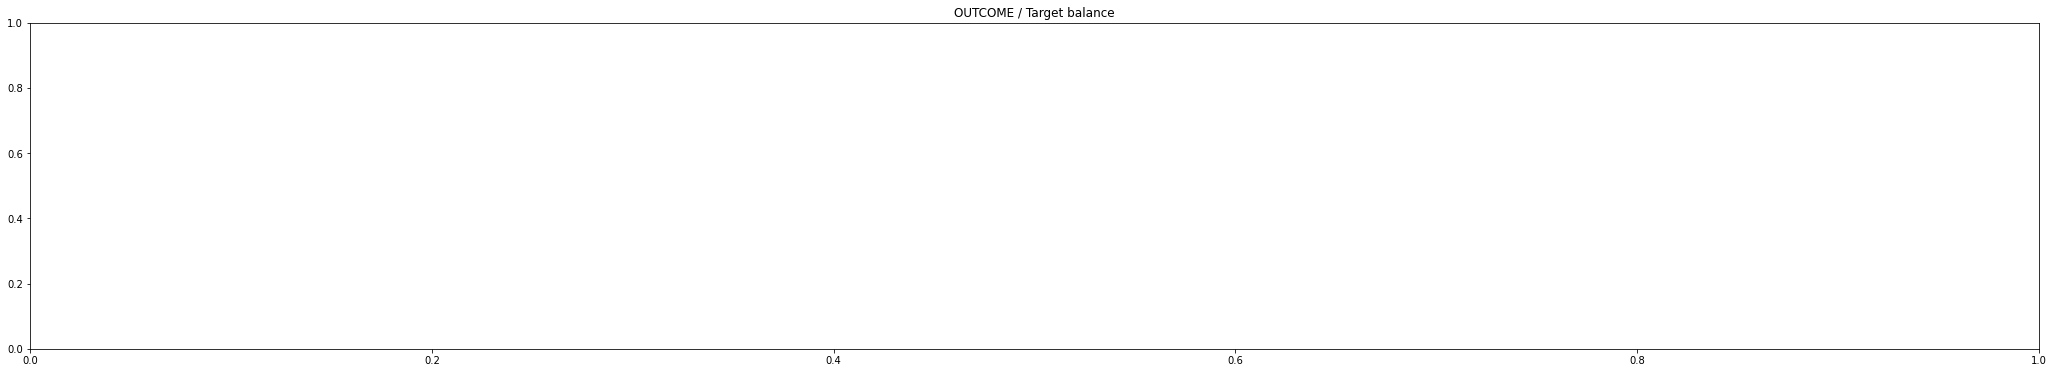

In [51]:
plt.figure(figsize=(36,6))
ax=sns.histplot(df=y_resampled,stat='count')
for i in ax.containers:
    ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()

Modelling and Validation

Creating a function for easy visualization between scaled and unscaled data

In [53]:
def vizr(unscaled_set, scaled_set):
    plt.figure(figsize=(20,10))
    # ACCURACY UNSCALED PLOT 1
    plt.subplot(2,4,1)
    plt.plot(unscaled_set['test_accuracy'],label='Test')
    plt.plot(unscaled_set['train_accuracy'],label='Train')
    plt.title('Accuracy Unscaled')
    plt.legend()
    # ACCURACY SCALED PLOT 2
    plt.subplot(2,4,2)
    plt.plot(scaled_set['test_accuracy'],label='Test')
    plt.plot(scaled_set['train_accuracy'],label='Train')
    plt.title('Accuracy Scaled')
    plt.legend()
    # F1 UNSCALED PLOT 3
    plt.subplot(2,4,3)
    plt.plot(unscaled_set['test_f1'],label='Test')
    plt.plot(unscaled_set['train_f1'],label='Train')
    plt.title('f1 score Unscaled')
    plt.legend()
    # F1 SCALED PLOT 4
    plt.subplot(2,4,4)
    plt.plot(scaled_set['test_f1'],label='Test')
    plt.plot(scaled_set['train_f1'],label='Train')
    plt.title('f1 score Scaled')
    plt.legend()
    # RECALL UNSCALED PLOT 5
    plt.subplot(2,4,5)
    plt.plot(unscaled_set['test_recall'],label='Test')
    plt.plot(unscaled_set['train_recall'],label='Train')
    plt.title('Recall Unscaled')
    plt.legend()
    # RECALL SCALED PLOT 6
    plt.subplot(2,4,6)
    plt.plot(scaled_set['test_recall'],label='Test')
    plt.plot(scaled_set['train_recall'],label='Train')
    plt.title('Recall Scaled')
    plt.legend()
    # PRECISION UNSCALED PLOT 7
    plt.subplot(2,4,7)
    plt.plot(unscaled_set['test_precision'],label='Test')
    plt.plot(unscaled_set['train_precision'],label='Train')
    plt.title('Precision Unscaled')
    plt.legend()
    # PRECISION SCALED PLOT 8
    plt.subplot(2,4,8)
    plt.plot(scaled_set['test_precision'],label='Test')
    plt.plot(scaled_set['train_precision'],label='Train')
    plt.title('Precision Scaled')
    plt.legend()
   
    plt.tight_layout()

KNN algorithm for classification

In [54]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
sknc = KNeighborsClassifier() # We will keep the default parameters

x set

  Mean accuracy score:  68.47
  Mean f1 score:        68.4
  Mean recall score:    68.25
  Mean precision score: 68.61


{'fit_time': array([0.0060792 , 0.00424767, 0.00388908, 0.00999475, 0.00422978]),
 'score_time': array([0.01433706, 0.01332641, 0.02566361, 0.01340556, 0.01341271]),
 'test_accuracy': array([0.66666667, 0.62616822, 0.6728972 , 0.6728972 , 0.78504673]),
 'train_accuracy': array([0.78738318, 0.77855478, 0.77156177, 0.78088578, 0.76689977]),
 'test_f1': array([0.66037736, 0.62962963, 0.66019417, 0.68468468, 0.78504673]),
 'train_f1': array([0.78983834, 0.77751756, 0.76555024, 0.77934272, 0.7706422 ]),
 'test_recall': array([0.64814815, 0.64150943, 0.64150943, 0.7037037 , 0.77777778]),
 'train_recall': array([0.79906542, 0.77209302, 0.74418605, 0.77570093, 0.78504673]),
 'test_precision': array([0.67307692, 0.61818182, 0.68      , 0.66666667, 0.79245283]),
 'train_precision': array([0.78082192, 0.78301887, 0.78817734, 0.78301887, 0.75675676])}

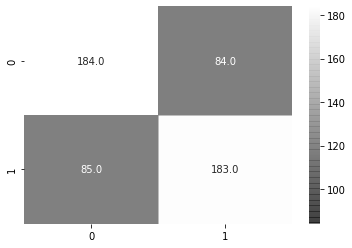

In [56]:
# We will enter our estimator(algo), X (features),y (target), cv(folds / splits of dataset)

knn_CV = cross_validate(knc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(knn_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(knn_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(knn_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(knn_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
knn_pred = cross_val_predict(knc,X_resampled, y_resampled, cv=5)
knn_conf = confusion_matrix(y_resampled, knn_pred)
sns.heatmap(knn_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
knn_CV

Scaled x set

  Mean accuracy score:  68.28
  Mean f1 score:        67.01
  Mean recall score:    64.89
  Mean precision score: 70.0


{'fit_time': array([0.01542449, 0.00182033, 0.00175166, 0.00464797, 0.00202513]),
 'score_time': array([0.02630115, 0.01122975, 0.01092339, 0.02364945, 0.02655482]),
 'test_accuracy': array([0.7037037 , 0.64485981, 0.65420561, 0.70093458, 0.71028037]),
 'train_accuracy': array([0.79672897, 0.7972028 , 0.7995338 , 0.8041958 , 0.78787879]),
 'test_f1': array([0.70909091, 0.64814815, 0.61052632, 0.70909091, 0.67368421]),
 'train_f1': array([0.78934625, 0.79334917, 0.79227053, 0.8       , 0.78281623]),
 'test_recall': array([0.72222222, 0.66037736, 0.54716981, 0.72222222, 0.59259259]),
 'train_recall': array([0.76168224, 0.77674419, 0.7627907 , 0.78504673, 0.76635514]),
 'test_precision': array([0.69642857, 0.63636364, 0.69047619, 0.69642857, 0.7804878 ]),
 'train_precision': array([0.81909548, 0.81067961, 0.8241206 , 0.81553398, 0.8       ])}

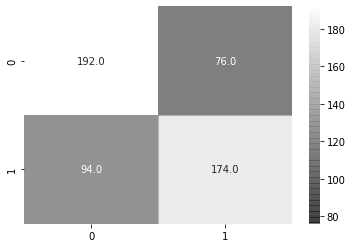

In [57]:
sknn_CV = cross_validate(sknc,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(sknn_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(sknn_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(sknn_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(sknn_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
sknn_pred = cross_val_predict(sknc,sX_resampled, y_resampled, cv=5)
sknn_conf = confusion_matrix(y_resampled, sknn_pred)
sns.heatmap(sknn_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
sknn_CV

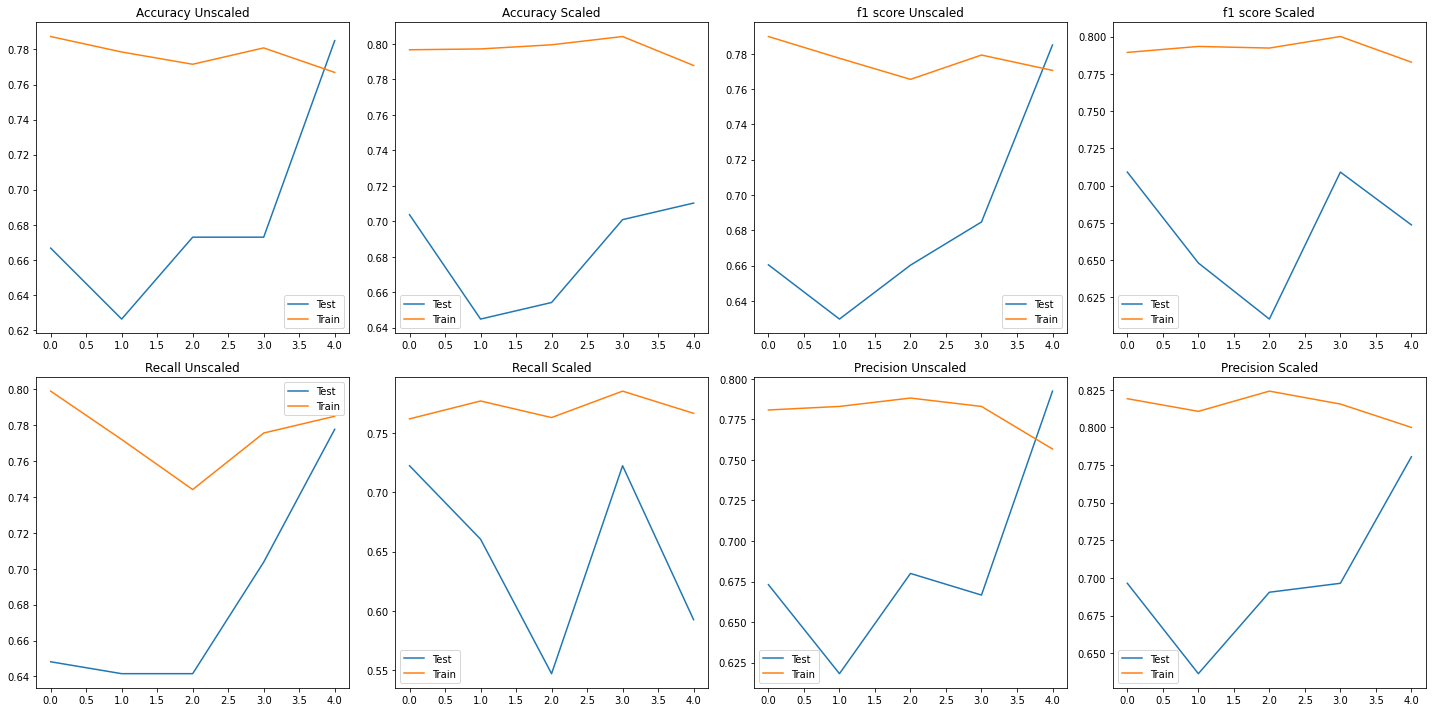

In [58]:
vizr(knn_CV,sknn_CV)

Comparison with other Algorithms

In [59]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced') #Default parameters
slogreg = LogisticRegression()

X set

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


  Mean accuracy score:  73.69
  Mean f1 score:        73.21
  Mean recall score:    71.99
  Mean precision score: 74.56


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([0.03493762, 0.02564955, 0.02561855, 0.02558303, 0.0252142 ]),
 'score_time': array([0.00624847, 0.00460291, 0.00432205, 0.00437236, 0.00445962]),
 'test_accuracy': array([0.75      , 0.70093458, 0.71028037, 0.75700935, 0.76635514]),
 'train_accuracy': array([0.7453271 , 0.75990676, 0.75757576, 0.74358974, 0.73892774]),
 'test_f1': array([0.73786408, 0.69811321, 0.69902913, 0.76363636, 0.76190476]),
 'train_f1': array([0.74473068, 0.75764706, 0.75700935, 0.74178404, 0.7370892 ]),
 'test_recall': array([0.7037037 , 0.69811321, 0.67924528, 0.77777778, 0.74074074]),
 'train_recall': array([0.74299065, 0.74883721, 0.75348837, 0.73831776, 0.73364486]),
 'test_precision': array([0.7755102 , 0.69811321, 0.72      , 0.75      , 0.78431373]),
 'train_precision': array([0.74647887, 0.76666667, 0.76056338, 0.74528302, 0.74056604])}

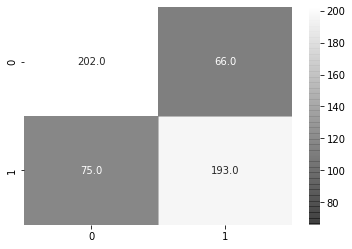

In [60]:
logreg_CV = cross_validate(logreg,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(logreg_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(logreg_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(logreg_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(logreg_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
lr_pred = cross_val_predict(logreg,X_resampled, y_resampled, cv=5)
lr_conf = confusion_matrix(y_resampled, lr_pred)
sns.heatmap(lr_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
logreg_CV

Scaled X set

  Mean accuracy score:  72.76
  Mean f1 score:        72.46
  Mean recall score:    71.61
  Mean precision score: 73.5


{'fit_time': array([0.00867605, 0.00520492, 0.00515103, 0.00457573, 0.00465202]),
 'score_time': array([0.00304675, 0.00283837, 0.00316477, 0.00310183, 0.00287199]),
 'test_accuracy': array([0.75      , 0.68224299, 0.68224299, 0.71962617, 0.80373832]),
 'train_accuracy': array([0.7453271 , 0.75757576, 0.75757576, 0.74825175, 0.73426573]),
 'test_f1': array([0.74285714, 0.68518519, 0.66666667, 0.73214286, 0.7961165 ]),
 'train_f1': array([0.74592075, 0.75471698, 0.75238095, 0.74162679, 0.72727273]),
 'test_recall': array([0.72222222, 0.69811321, 0.64150943, 0.75925926, 0.75925926]),
 'train_recall': array([0.74766355, 0.74418605, 0.73488372, 0.72429907, 0.71028037]),
 'test_precision': array([0.76470588, 0.67272727, 0.69387755, 0.70689655, 0.83673469]),
 'train_precision': array([0.74418605, 0.76555024, 0.77073171, 0.75980392, 0.74509804])}

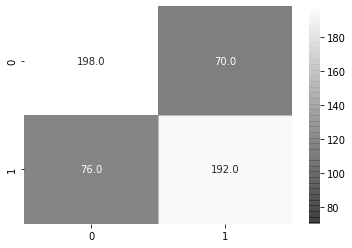

In [61]:
slogreg_CV = cross_validate(slogreg,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(slogreg_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(slogreg_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(slogreg_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(slogreg_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
slr_pred = cross_val_predict(slogreg,sX_resampled, y_resampled, cv=5)
slr_conf = confusion_matrix(y_resampled, slr_pred)
sns.heatmap(slr_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
slogreg_CV

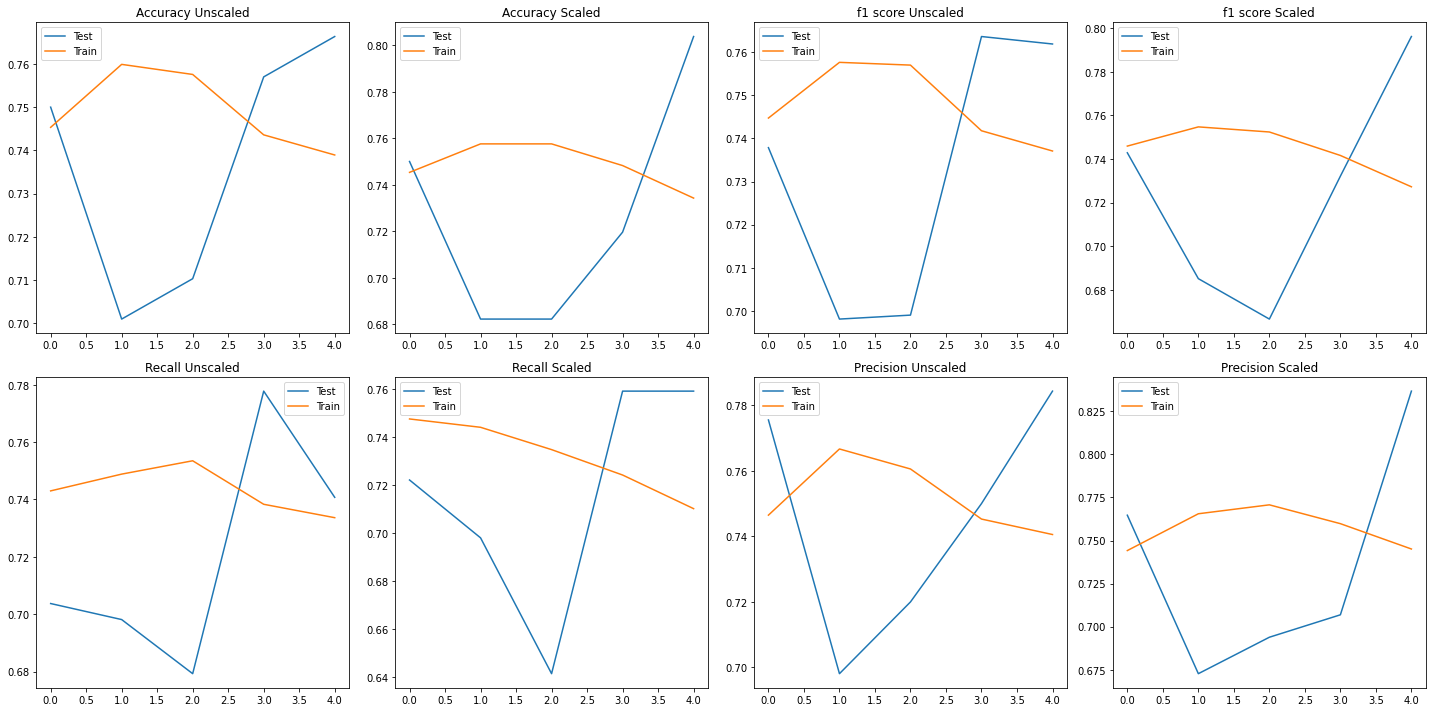

In [62]:
vizr(logreg_CV,slogreg_CV)

Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,max_leaf_nodes=15,n_estimators=100,class_weight='balanced_subsample')
srfc = RandomForestClassifier(max_depth=5,max_leaf_nodes=7,n_estimators=100,class_weight='balanced',ccp_alpha=0.01)

X set

  Mean accuracy score:  74.81
  Mean f1 score:        75.25
  Mean recall score:    76.11
  Mean precision score: 74.63


{'fit_time': array([0.19628453, 0.18599176, 0.20653772, 0.18910646, 0.18188286]),
 'score_time': array([0.01687121, 0.01800251, 0.01552939, 0.01439142, 0.01430488]),
 'test_accuracy': array([0.76851852, 0.72897196, 0.68224299, 0.72897196, 0.8317757 ]),
 'train_accuracy': array([0.85514019, 0.86247086, 0.85547786, 0.84615385, 0.85547786]),
 'test_f1': array([0.7706422 , 0.73873874, 0.69090909, 0.73873874, 0.82352941]),
 'train_f1': array([0.86036036, 0.86621315, 0.85844749, 0.85067873, 0.85909091]),
 'test_recall': array([0.77777778, 0.77358491, 0.71698113, 0.75925926, 0.77777778]),
 'train_recall': array([0.89252336, 0.88837209, 0.8744186 , 0.87850467, 0.88317757]),
 'test_precision': array([0.76363636, 0.70689655, 0.66666667, 0.71929825, 0.875     ]),
 'train_precision': array([0.83043478, 0.84513274, 0.84304933, 0.8245614 , 0.83628319])}

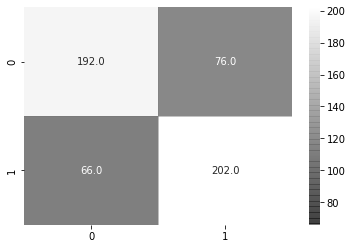

In [64]:
rfc_CV = cross_validate(rfc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(rfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(rfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(rfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(rfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
rfc_pred = cross_val_predict(rfc,X_resampled, y_resampled, cv=5)
rfc_conf = confusion_matrix(y_resampled, rfc_pred)
sns.heatmap(rfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
rfc_CV

Scaled X set

  Mean accuracy score:  73.13
  Mean f1 score:        74.33
  Mean recall score:    77.6
  Mean precision score: 71.43


{'fit_time': array([0.14916158, 0.14237785, 0.15098953, 0.15215087, 0.14512324]),
 'score_time': array([0.0128181 , 0.01269269, 0.01646113, 0.01302767, 0.01677227]),
 'test_accuracy': array([0.76851852, 0.69158879, 0.70093458, 0.71028037, 0.78504673]),
 'train_accuracy': array([0.80140187, 0.7995338 , 0.79487179, 0.7995338 , 0.77855478]),
 'test_f1': array([0.77876106, 0.7079646 , 0.71428571, 0.73043478, 0.78504673]),
 'train_f1': array([0.81236203, 0.80365297, 0.80090498, 0.80888889, 0.78841871]),
 'test_recall': array([0.81481481, 0.75471698, 0.75471698, 0.77777778, 0.77777778]),
 'train_recall': array([0.85981308, 0.81860465, 0.82325581, 0.85046729, 0.8271028 ]),
 'test_precision': array([0.74576271, 0.66666667, 0.6779661 , 0.68852459, 0.79245283]),
 'train_precision': array([0.76987448, 0.78923767, 0.77973568, 0.77118644, 0.75319149])}

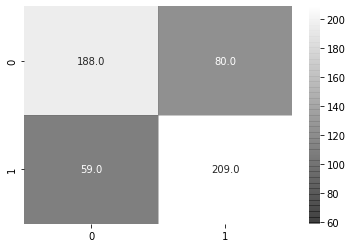

In [65]:
srfc_CV = cross_validate(srfc,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(srfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(srfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(srfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(srfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
srfc_pred = cross_val_predict(srfc,sX_resampled, y_resampled, cv=5)
srfc_conf = confusion_matrix(y_resampled, srfc_pred)
sns.heatmap(srfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
srfc_CV

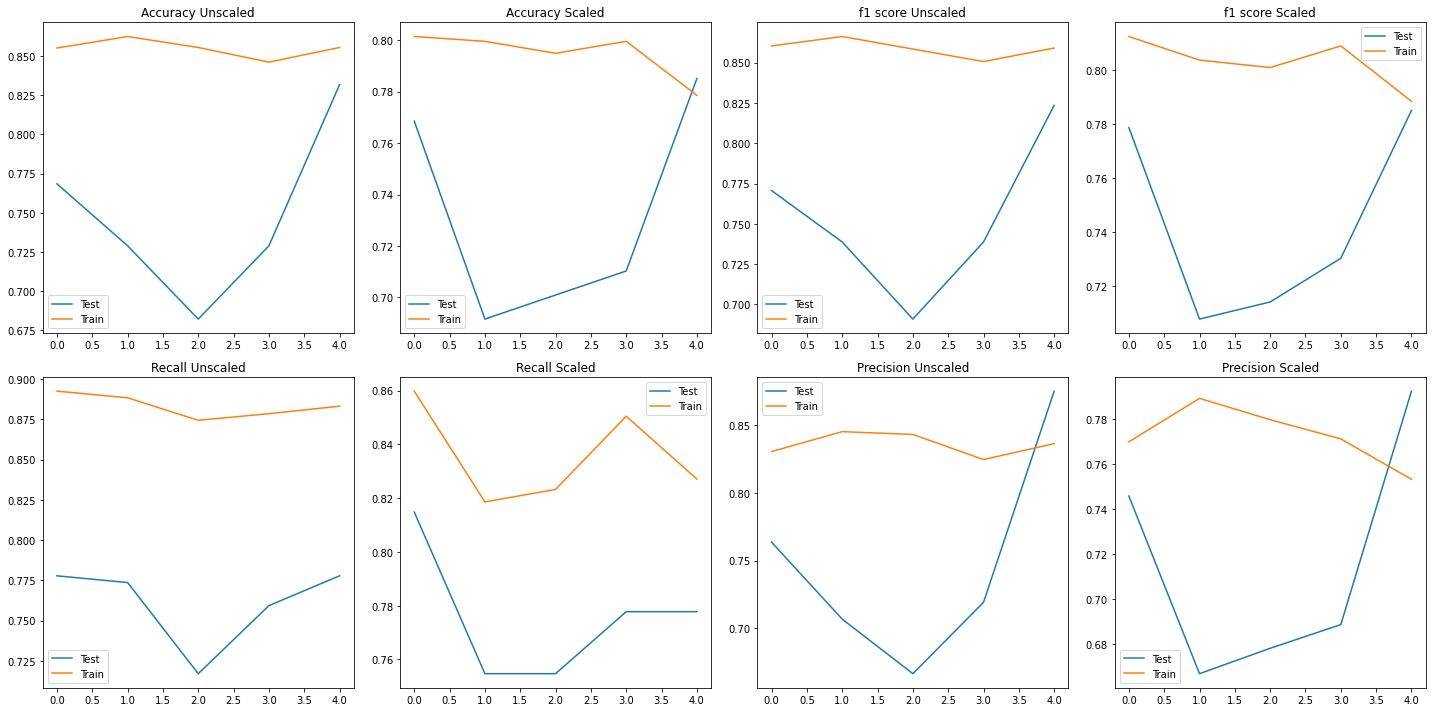

In [66]:
vizr(rfc_CV,srfc_CV)

ANN

In [67]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=631)

In [69]:
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.transform(X_test)

In [70]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (375, 8)
X_test: (161, 8)
y_train: (375,)
y_test: (161,)


Initializing the ANN

In [71]:
ann = tf.keras.models.Sequential()

Adding input and first hidden layer

In [72]:
ann.add(tf.keras.layers.Dense(units=4,activation='relu'))
# THIRD layer
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
# FOURTH layer
ann.add(tf.keras.layers.Dense(units=32,activation='tanh'))
# FIFTH layer
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=4,activation='relu'))

Adding output layer

In [73]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training the ANN

In [74]:
# for non-binary: categorical_crossentropy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [75]:
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.4827
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4880
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4720
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4880
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5360
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5173
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5360
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5467
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5333
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5333
Epoch 11/

In [76]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.35

6/6 [==============================] - 0s 2ms/step


In [77]:
y_pred = y_pred.astype('int')

precision score 0.884
recall score 0.724
f1 score 0.796
accuracy score 0.758


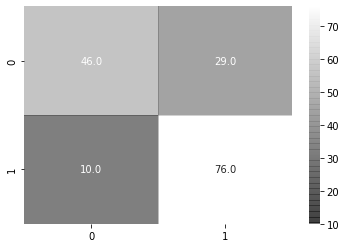

In [78]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print('precision score',round(precision_score(y_pred,y_test),ndigits=3))
print('recall score',round(recall_score(y_pred,y_test),ndigits=3))
print('f1 score',round(f1_score(y_pred,y_test),ndigits=3))
print('accuracy score',round(accuracy_score(y_pred,y_test),ndigits=3))

conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)

As we didn't cross_validate with ANN, we will run it for 5 times with different random states to change the data for training and testing

In [79]:
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []

for i in range(0,5,1):
    X_train,X_test,y_train,y_test = train_test_split(sX_resampled,y_resampled,test_size=0.3,random_state=i)
    sX_train = mmscaler.fit_transform(X_train)
    sX_test = mmscaler.transform(X_test)
    ann = tf.keras.models.Sequential()

    # THIRD layer
    ann.add(tf.keras.layers.Dense(units=4,activation='relu'))
    # THIRD layer
    ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
    # FOURTH layer
    ann.add(tf.keras.layers.Dense(units=32,activation='tanh'))
    # FIFTH layer
    ann.add(tf.keras.layers.Dense(units=16,activation='relu')) # OUTPUT layer
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
    ann.fit(sX_train, y_train, batch_size=32, epochs=100, verbose=0)
    y_pred = ann.predict(sX_test)
    y_pred = y_pred > 0.35
    
    print('Random state',i)
    print('precision score',round(precision_score(y_pred,y_test),ndigits=3))
    precision_list.append(precision_score(y_pred,y_test))

    print('recall score',round(recall_score(y_pred,y_test),ndigits=3))
    recall_list.append(round(recall_score(y_pred,y_test),ndigits=3))
    
    print('f1 score',round(f1_score(y_pred,y_test),ndigits=3))
    f1_list.append(round(f1_score(y_pred,y_test),ndigits=3))
    
    print('accuracy score',round(accuracy_score(y_pred,y_test),ndigits=3),'\n')
    accuracy_list.append(round(accuracy_score(y_pred,y_test),ndigits=3))

6/6 [==============================] - 0s 2ms/step
Random state 0
precision score 0.854
recall score 0.667
f1 score 0.749
accuracy score 0.708 

6/6 [==============================] - 0s 2ms/step
Random state 1
precision score 0.782
recall score 0.739
f1 score 0.76
accuracy score 0.733 

6/6 [==============================] - 0s 2ms/step
Random state 2
precision score 0.765
recall score 0.653
f1 score 0.705
accuracy score 0.677 

6/6 [==============================] - 0s 2ms/step
Random state 3
precision score 0.896
recall score 0.627
f1 score 0.738
accuracy score 0.696 

6/6 [==============================] - 0s 3ms/step
Random state 4
precision score 0.877
recall score 0.703
f1 score 0.78
accuracy score 0.752 



In [80]:
ann_precision_score = np.array(precision_list)
ann_recall_score = np.array(recall_list)
ann_f1_score = np.array(f1_list)
ann_accuracy_score = np.array(accuracy_list)

In [81]:
print('Mean accuracy ANN :',round(ann_accuracy_score.mean(),ndigits=3))
print('Mean f1 ANN       :',round(ann_f1_score.mean(),ndigits=3))
print('Mean precision ANN:',round(ann_precision_score.mean(),ndigits=3))
print('Mean recall ANN   :',round(ann_recall_score.mean(),ndigits=3))

Mean accuracy ANN : 0.713
Mean f1 ANN       : 0.746
Mean precision ANN: 0.835
Mean recall ANN   : 0.678


In [82]:
ann_scores = {'test_accuracy':ann_accuracy_score,
             'test_recall':ann_recall_score,
             'test_f1':ann_f1_score,
             'test_precision':ann_precision_score}

Mean scores of all models

Defining a function for reproducibility

In [85]:
def measures(scorer):
    """scorer takes in the scored metric from cross validate,enter the metric and enclose in quotes ,eg:('test_accuracy'), and shows the accuracy for all the models built"""
    accuracy_scores ={'KNN':knn_CV[scorer].mean()*100,'S_KNN':sknn_CV[scorer].mean()*100,
                   'LogReg':logreg_CV[scorer].mean()*100,'S_LogReg':slogreg_CV[scorer].mean()*100,
                   'Random Forests':rfc_CV[scorer].mean()*100,'S_Random Forests':srfc_CV[scorer].mean()*100,
                   'XGB':xgbc_CV[scorer].mean()*100,'S_XGB':sxgbc_CV[scorer].mean()*100,
                   'GNB':gnb_CV[scorer].mean()*100,'S_GNB':sgnb_CV[scorer].mean()*100,
                   'Catboost':cbc_CV[scorer].mean()*100,'S_Catboost':scbc_CV[scorer].mean()*100,
                   'Gradient Boosting':gbc_CV[scorer].mean()*100,'S_Gradient Boosting':sgbc_CV[scorer].mean()*100,
                   'ANN':ann_scores[scorer].mean()*100}
    plt.figure(figsize=(20,5))
    bar = plt.bar(accuracy_scores.keys(),accuracy_scores.values(),color=['orange','k'],alpha=0.65,width=0.4)
    plt.plot(accuracy_scores.values(),marker='o',linestyle='--',mfc='k',mec='k')
    plt.xticks(rotation=40,color='Red')
    if scorer == 'test_accuracy':
        plt.title('Accuracy scores',size=20)
    elif scorer == 'test_f1':
        plt.title('F1 scores',size=20)
    elif scorer == 'test_recall':
        plt.title('Recall scores',size=20)
    elif scorer == 'test_precision':
        plt.title('Precision scores',size=20)
    plt.tight_layout()
    plt.show()

In [89]:
scores = ['test_precision','test_f1','test_recall','test_accuracy']
help(measures)

Help on function measures in module __main__:

measures(scorer)
    scorer takes in the scored metric from cross validate,enter the metric and enclose in quotes ,eg:('test_accuracy'), and shows the accuracy for all the models built



Though we made two sets of data (scaled and unscaled), we did not fit a model with unscaled values for Neural Network (Neural Network recommends scaled values only)
Throughout all of the models ANN gave a high score among all metrics

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Confusion matrix:
  
0  TP  FP

1 FN  TN

    0   1 

Sensitivity: (TP) / (TP + FN)

Specificity: (TN) / (TN + FP)

TPR: (TP) / (TP + FN)

Importing metrics for AUC, classification report

In [94]:
from sklearn.metrics import roc_curve,auc,classification_report

In [95]:
def aucp(prediction):

    fpr, tpr, thresholds = roc_curve(y_resampled, prediction)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    print('AUC score',auc(fpr, tpr),'\n')

KNN-AUC

0.6847014925373134


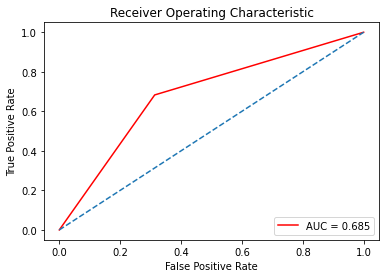

In [96]:
fpr, tpr, thresholds = roc_curve(y_resampled, knn_pred)
knn_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
knn_auc = auc(fpr,tpr)
print(knn_auc)
plt.show()

S-KNN AUC

0.6828358208955224


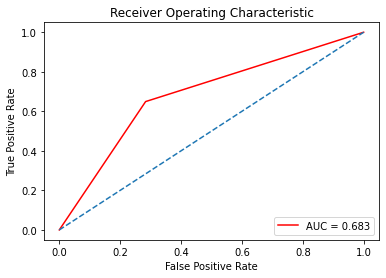

In [97]:
fpr, tpr, thresholds = roc_curve(y_resampled, sknn_pred)
sknn_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % sknn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sknn_auc = auc(fpr,tpr)
print(sknn_auc)
plt.show()

LR AUC

0.7369402985074627


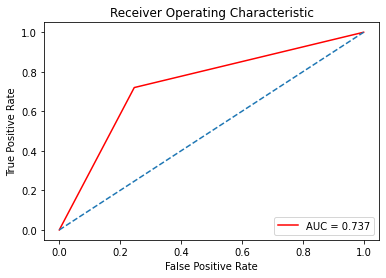

In [98]:
fpr, tpr, thresholds = roc_curve(y_resampled, lr_pred)
lr_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
lr_auc = auc(fpr,tpr)
print(lr_auc)
plt.show()

0.7276119402985074


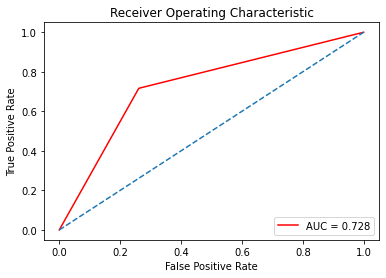

In [99]:
fpr, tpr, thresholds = roc_curve(y_resampled, slr_pred)
slr_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % slr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
slr_auc = auc(fpr,tpr)
print(slr_auc)
plt.show()

0.7350746268656717


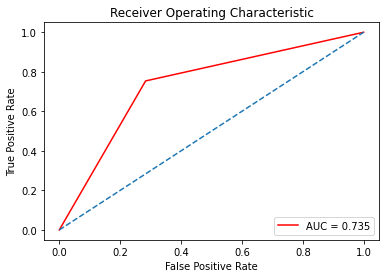

In [100]:
fpr, tpr, thresholds = roc_curve(y_resampled, rfc_pred)
rfc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % rfc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
rfc_auc = auc(fpr,tpr)
print(rfc_auc)
plt.show()

0.7406716417910447


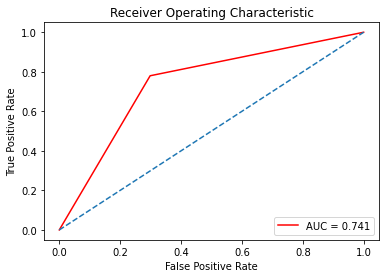

In [101]:
fpr, tpr, thresholds = roc_curve(y_resampled, srfc_pred)
srfc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % srfc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
srfc_auc = auc(fpr,tpr)
print(srfc_auc)
plt.show()

0.7507716049382716


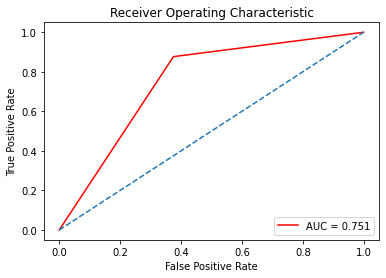

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ann_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % ann_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ann_auc = auc(fpr,tpr)
print(ann_auc)
plt.show()

AUC (Area Under Curve) metric

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

In [104]:
auc_scores = {'Models':['KNN','S_KNN','LogReg','S_LogReg','RFc','S_RFc','ANN'],
              'AUC score':[knn_auc,sknn_auc,lr_auc,slr_auc,rfc_auc,srfc_auc,ann_auc]}

In [105]:
df_auc = pd.DataFrame(auc_scores)
df_auc.sort_values(by='AUC score',ascending=False,inplace=True)

Sorted Descending values of AUC Score for all models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

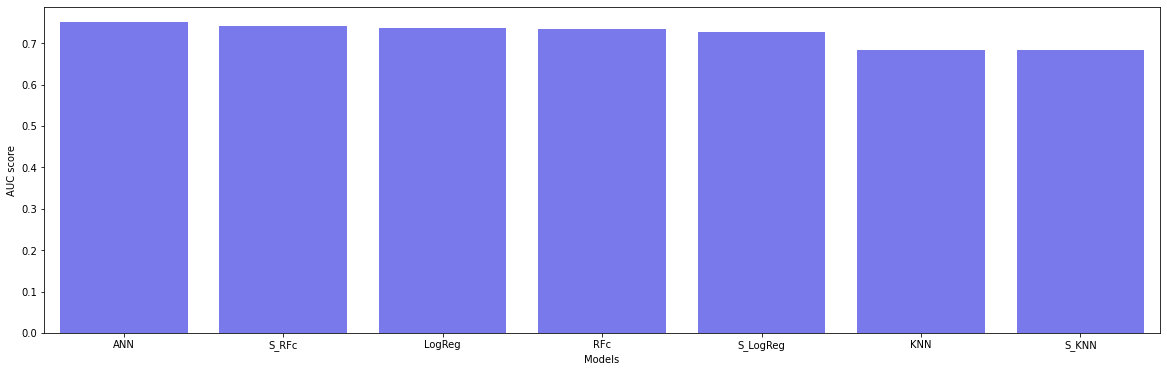

In [106]:
plt.figure(figsize=(20,6))
ax = sns.barplot(df_auc['Models'],df_auc['AUC score'],alpha=0.6, color='blue')
for i in ax.containers:
    ax.bar_label(i)

Defining a function for getting a classification report of machine learning models

In [107]:
def clf_report(preds):
    print(classification_report(y_resampled,preds))

In [108]:
print('KNN')
clf_report(knn_pred)
print('S_KNN')
clf_report(sknn_pred)
print('LR')
clf_report(lr_pred)
print('S_LR')
clf_report(slr_pred)
print('RFc')
clf_report(rfc_pred)
print('S_RFc')
clf_report(srfc_pred)
print('ANN')
print(classification_report(y_test,y_pred))

KNN
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       268
           1       0.69      0.68      0.68       268

    accuracy                           0.68       536
   macro avg       0.68      0.68      0.68       536
weighted avg       0.68      0.68      0.68       536

S_KNN
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       268
           1       0.70      0.65      0.67       268

    accuracy                           0.68       536
   macro avg       0.68      0.68      0.68       536
weighted avg       0.68      0.68      0.68       536

LR
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       268
           1       0.75      0.72      0.73       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536

S_LR
 

In [109]:
df_auc

,Models,AUC score
6,ANN,0.750772
5,S_RFc,0.740672
2,LogReg,0.736940
4,RFc,0.735075
3,S_LogReg,0.727612
0,KNN,0.684701
1,S_KNN,0.682836


Accoding to AUC Scores ANN Model did well
